#Income

In [ ]:
import numpy as np
import pandas as pd
import math
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

default_user = {
    "income": 60000,
    "crime": "low",
    "weather": "sunny"
}

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls "/content/drive/MyDrive/CMCS320_FinalProject"

 CMSC320_FinalProject_Data.ipynb
'Final Project CMSC320.gdoc'
'Individual_Median_Income_MD_Cities(2020).csv'


In [ ]:
income_data = pd.read_csv('/content/drive/MyDrive/CMCS320_FinalProject/Individual_Median_Income_MD_Cities(2020).csv')
metrics = ["Entity DCID", "Entity properties name", "Variable observation value"]
income_data.head()

,Entity DCID,Entity properties isoCode,Entity properties name,Variable DCID,Variable observation date,Variable observation metadata importName,Variable observation metadata provenanceUrl,Variable observation metadata scalingFactor,Variable observation metadata unit,Variable observation metadata unitDisplayName,Variable observation value,Variable properties name
0,geoId/2400125,NaN,Aberdeen,Median_Income_Person,2020,CensusACS5YearSurvey,https://www.census.gov/programs-surveys/acs/da...,NaN,USDollar,USD,31838,Median Income of a Population
1,geoId/2400175,NaN,Aberdeen Proving Ground,Median_Income_Person,2020,CensusACS5YearSurvey,https://www.census.gov/programs-surveys/acs/da...,NaN,USDollar,USD,42152,Median Income of a Population
2,geoId/2400200,NaN,Abingdon,Median_Income_Person,2020,CensusACS5YearSurvey,https://www.census.gov/programs-surveys/acs/da...,NaN,USDollar,USD,52767,Median Income of a Population
3,geoId/2400225,NaN,Accident,Median_Income_Person,2020,CensusACS5YearSurvey,https://www.census.gov/programs-surveys/acs/da...,NaN,USDollar,USD,27083,Median Income of a Population
4,geoId/2400250,NaN,Accokeek,Median_Income_Person,2020,CensusACS5YearSurvey,https://www.census.gov/programs-surveys/acs/da...,NaN,USDollar,USD,66531,Median Income of a Population


In [ ]:
income_data.isnull().sum()

,0
Entity DCID,0
Entity properties isoCode,500
Entity properties name,0
Variable DCID,0
Variable observation date,0
Variable observation metadata importName,0
Variable observation metadata provenanceUrl,0
Variable observation metadata scalingFactor,500
Variable observation metadata unit,0
Variable observation metadata unitDisplayName,0


In [ ]:
variable_dcids = income_data["Variable DCID"].unique()[0]
variable_metadata_import_name = income_data["Variable observation metadata importName"].unique()[0]
variable_dcids, variable_metadata_import_name

('Median_Income_Person', 'CensusACS5YearSurvey')

In [ ]:
income_df = income_data[metrics]
income_df = income_df.rename(columns={
    "Entity DCID": "DCID",
    "Entity properties name": "City",
    "Variable observation value": "Income",
})

print(income_df.shape)
income_df.head()

(500, 3)


,DCID,City,Income
0,geoId/2400125,Aberdeen,31838
1,geoId/2400175,Aberdeen Proving Ground,42152
2,geoId/2400200,Abingdon,52767
3,geoId/2400225,Accident,27083
4,geoId/2400250,Accokeek,66531


In [ ]:
income_df.describe()

,Income
count,500.000000
mean,43074.290000
std,18155.358294
min,2499.000000
25%,31606.000000
50%,40012.500000
75%,52268.250000
max,138500.000000


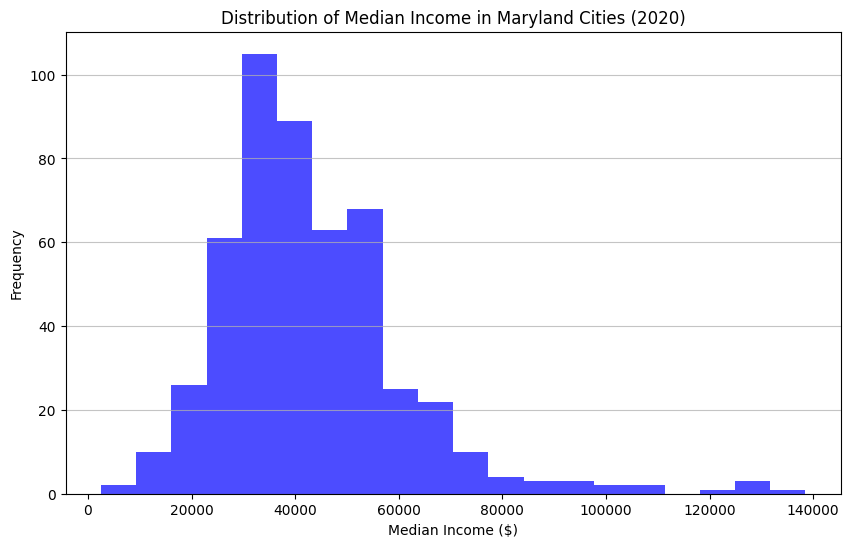

In [ ]:
plt.figure(figsize=(10, 6))
plt.title('Distribution of Median Income in Maryland Cities (2020)')
plt.xlabel('Median Income ($)')
plt.ylabel('Frequency')

plt.hist(income_df["Income"], bins=20, color='blue', alpha=0.7)
plt.grid(axis='y', alpha=0.75)

plt.show()

### Hypothesis Test: Is the User’s Income Significantly Different from the Average?

We used a one-sample t-test to evaluate whether the user's income is significantly different from the average income across Maryland cities. Since the optimal city depends on user preferences, we created a default profile for this analysis. The default user's income is set at \$60,000.

**Null Hypothesis (H₀):** The mean income of cities in Maryland equals the user's income.  
**Alternative Hypothesis (H₁):** The mean income of cities is different from the user's income.

**Result:**  
T-statistic = -20.85  
P-value < 0.05

**Conclusion:**  
There is strong statistical evidence that the user's income is significantly different from the average income across Maryland cities. The **T-statistic of -20.85** indicates that the average city income is far below the user's income—by over 20 standard errors. The **P-value < 0.05** confirms that this difference is highly unlikely to be due to random chance.

**How this helps the user:**  
This result suggests that the user can afford to live in many cities across Maryland. By comparing the user's income to city-level incomes, we can filter out unaffordable locations and focus recommendations on cities where the cost of living (as proxied by income levels) is within reach. This test supports one part of our goal: helping users find cities that are economically suitable based on their income.

In [ ]:
user_income = default_user["income"]
t_stat, p_value = stats.ttest_1samp(income_df["Income"], user_income)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.3f}")

T-statistic: -20.85, P-value: 0.000


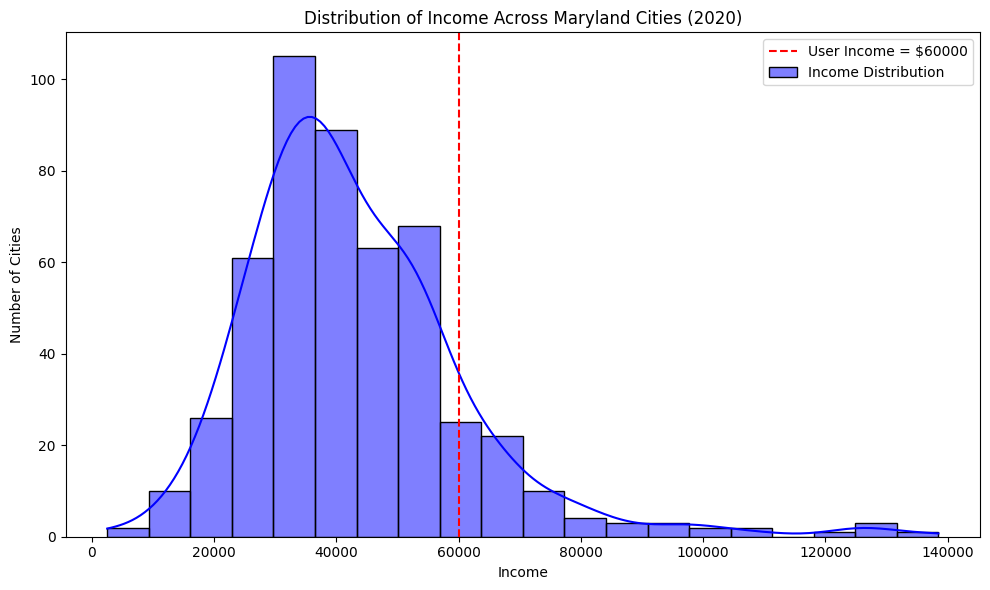

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(income_df["Income"], bins=20, kde=True, color='blue', label='Income Distribution')
plt.axvline(default_user['income'], color='red', linestyle='--', label=f"User Income = ${default_user['income']}")
plt.title("Distribution of Income Across Maryland Cities (2020)")
plt.xlabel("Income")
plt.ylabel("Number of Cities")
plt.legend()
plt.tight_layout()
plt.show()

# Violent Crime

In [ ]:
import pandas as pd
import numpy as np
import glob
import os
import seaborn as sns

!pip install adjustText

import matplotlib.pyplot as plt
from adjustText import adjust_text  # pip install

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
url = "https://opendata.maryland.gov/resource/jwfa-fdxs.csv"

crime_df = pd.read_csv(url)
crime_df

,jurisdiction,year,population,murder,rape,robbery,agg_assault,b_e,larceny_theft,m_v_theft,...,b_e_per_100_000_people,larceny_theft_per_100_000_people,m_v_theft_per_100_000_people,murder_rate_percent_change_per_100_000_people,rape_rate_percent_change_per_100_000_people,robbery_rate_percent_change_per_100_000_people,agg_assault_rate_percent_change_per_100_000_people,b_e_rate_percent_change_per_100_000_people,larceny_theft_rate_percent_change_per_100_000_people,m_v_theft_rate_percent_change_per_100_000_people
0,Allegany County,1975,79655,3,5,20,114,669,1425,93,...,839.9,1789.0,116.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Allegany County,1976,83923,2,2,24,59,581,1384,73,...,692.3,1649.1,87.0,-36.7,-62.0,13.9,-50.9,-17.6,-7.8,-25.5
2,Allegany County,1977,82102,3,7,32,85,592,1390,102,...,721.1,1693.0,124.2,53.3,257.8,36.3,47.3,4.2,2.7,42.8
3,Allegany County,1978,79966,1,2,18,81,539,1390,100,...,674.0,1738.2,125.1,-65.8,-70.7,-42.2,-2.2,-6.5,2.7,0.7
4,Allegany County,1979,79721,1,7,18,84,502,1611,99,...,629.7,2020.8,124.2,0.3,251.1,0.3,4.0,-6.6,16.3,-0.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Washington County,2004,138016,5,17,88,426,699,2138,270,...,506.5,1549.1,195.6,390.9,-27.4,-19.3,16.2,0.5,0.4,-2.9
996,Washington County,2005,140687,4,18,111,388,702,2306,261,...,499.0,1639.1,185.5,-21.5,3.9,23.7,-10.6,-1.5,5.8,-5.2
997,Washington County,2006,142284,4,28,158,378,786,2367,300,...,552.4,1663.6,210.8,-1.1,53.8,40.7,-3.7,10.7,1.5,13.7
998,Washington County,2007,144219,7,38,137,324,679,2338,240,...,470.8,1621.1,166.4,72.7,33.9,-14.5,-15.4,-14.8,-2.6,-21.1


In [ ]:
crime_df.index.stop

1000

In [ ]:
print(len(crime_df.columns))
crime_df.columns

38


Index(['jurisdiction', 'year', 'population', 'murder', 'rape', 'robbery',
       'agg_assault', 'b_e', 'larceny_theft', 'm_v_theft', 'grand_total',
       'percent_change', 'violent_crime_total', 'violent_crime_percent',
       'violent_crime_percent_change', 'property_crime_totals',
       'property_crime_percent', 'property_crime_percent_change',
       'overall_crime_rate_per_100_000_people',
       'overall_percent_change_per_100_000_people',
       'violent_crime_rate_per_100_000_people',
       'violent_crime_rate_percent_change_per_100_000_people',
       'property_crime_rate_per_100_000_people',
       'property_crime_rate_percent_change_per_100_000_people',
       'murder_per_100_000_people', 'rape_per_100_000_people',
       'robbery_per_100_000_people', 'agg_assault_per_100_000_people',
       'b_e_per_100_000_people', 'larceny_theft_per_100_000_people',
       'm_v_theft_per_100_000_people',
       'murder_rate_percent_change_per_100_000_people',
       'rape_rate_percent_c

In [ ]:
crime_df.dtypes

,0
jurisdiction,object
year,int64
population,int64
murder,int64
rape,int64
robbery,int64
agg_assault,int64
b_e,int64
larceny_theft,int64
m_v_theft,int64


In [ ]:
crime_df.columns = crime_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '', regex=False).str.replace(',','')
crime_df['county'] = crime_df['jurisdiction'].str.replace(r'\s+County$', '', regex=True)

# Drop 'jurisdiction' and reorder columns
cols = crime_df.columns.tolist()
cols.remove('jurisdiction')
cols.insert(0, cols.pop(cols.index('county')))
crime_df = crime_df[cols]


crime_df.columns

Index(['county', 'year', 'population', 'murder', 'rape', 'robbery',
       'agg_assault', 'b_e', 'larceny_theft', 'm_v_theft', 'grand_total',
       'percent_change', 'violent_crime_total', 'violent_crime_percent',
       'violent_crime_percent_change', 'property_crime_totals',
       'property_crime_percent', 'property_crime_percent_change',
       'overall_crime_rate_per_100_000_people',
       'overall_percent_change_per_100_000_people',
       'violent_crime_rate_per_100_000_people',
       'violent_crime_rate_percent_change_per_100_000_people',
       'property_crime_rate_per_100_000_people',
       'property_crime_rate_percent_change_per_100_000_people',
       'murder_per_100_000_people', 'rape_per_100_000_people',
       'robbery_per_100_000_people', 'agg_assault_per_100_000_people',
       'b_e_per_100_000_people', 'larceny_theft_per_100_000_people',
       'm_v_theft_per_100_000_people',
       'murder_rate_percent_change_per_100_000_people',
       'rape_rate_percent_change_

In [ ]:
crime_df_latest = crime_df[crime_df['year'] == crime_df['year'].max()]

# Drop rows with missing counties or crime rates
crime_df_latest = crime_df_latest.dropna(subset=['county', 'violent_crime_rate_per_100_000_people'])

In [ ]:
num_counties = crime_df_latest['county'].nunique()
num_features = len(crime_df_latest.columns)
print(f"\nNumber of counties: {num_counties}")
print(f"Number of features: {num_features}")



Number of counties: 21
Number of features: 38


In [ ]:
# Group by county and take the mean of all numeric columns
county_crime_df = crime_df_latest.groupby('county', as_index=False).mean(numeric_only=True)


display(county_crime_df.describe())

# Sort and get top/bottom
highest_crime = county_crime_df.sort_values('violent_crime_rate_per_100_000_people', ascending=False).head(1)
lowest_crime = county_crime_df.sort_values('violent_crime_rate_per_100_000_people').head(1)

# Display only the county and violent crime rate
print("Highest crime county:")
display(highest_crime[['county', 'violent_crime_rate_per_100_000_people']])

print("\nLowest crime county:")
display(lowest_crime[['county', 'violent_crime_rate_per_100_000_people']])



,year,population,murder,rape,robbery,agg_assault,b_e,larceny_theft,m_v_theft,grand_total,...,b_e_per_100_000_people,larceny_theft_per_100_000_people,m_v_theft_per_100_000_people,murder_rate_percent_change_per_100_000_people,rape_rate_percent_change_per_100_000_people,robbery_rate_percent_change_per_100_000_people,agg_assault_rate_percent_change_per_100_000_people,b_e_rate_percent_change_per_100_000_people,larceny_theft_rate_percent_change_per_100_000_people,m_v_theft_rate_percent_change_per_100_000_people
count,21.0,2.100000e+01,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,...,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,2020.0,2.737566e+05,26.714286,84.571429,334.333333,674.333333,671.619048,3282.857143,495.619048,5570.047619,...,227.595238,1014.352381,110.428571,74.185714,-11.995238,1.942857,11.852381,-17.423810,-18.433333,19.819048
std,0.0,3.227112e+05,73.419441,124.055863,785.284492,1251.985077,1105.114586,4460.700038,924.157155,8222.746837,...,152.496903,407.036513,120.450750,163.165178,19.781114,84.828701,34.176565,16.556325,8.652938,65.544249
min,2020.0,1.927300e+04,0.000000,3.000000,1.000000,17.000000,32.000000,91.000000,3.000000,152.000000,...,91.500000,472.200000,15.600000,-100.000000,-55.400000,-50.200000,-30.000000,-43.100000,-30.400000,-40.300000
25%,2020.0,3.698300e+04,1.000000,8.000000,9.000000,86.000000,82.000000,313.000000,19.000000,477.000000,...,112.800000,714.600000,42.000000,-2.600000,-20.300000,-32.100000,-6.700000,-25.100000,-24.700000,-15.500000
50%,2020.0,1.140310e+05,5.000000,24.000000,38.000000,169.000000,243.000000,1194.000000,86.000000,1744.000000,...,188.200000,938.900000,75.400000,0.000000,-10.200000,-20.600000,4.700000,-19.500000,-20.300000,-2.700000
75%,2020.0,3.290100e+05,16.000000,48.000000,137.000000,381.000000,346.000000,3000.000000,250.000000,3993.000000,...,246.300000,1269.000000,121.700000,108.000000,-0.500000,-14.700000,19.200000,-8.700000,-15.600000,23.800000
max,2020.0,1.055918e+06,334.000000,370.000000,3441.000000,5381.000000,4116.000000,12397.000000,3128.000000,28147.000000,...,699.300000,1940.700000,531.400000,593.600000,24.300000,350.000000,103.100000,26.900000,3.200000,225.200000


Highest crime county:


,county,violent_crime_rate_per_100_000_people
3,Baltimore City,1610.6



Lowest crime county:


,county,violent_crime_rate_per_100_000_people
6,Carroll,111.3


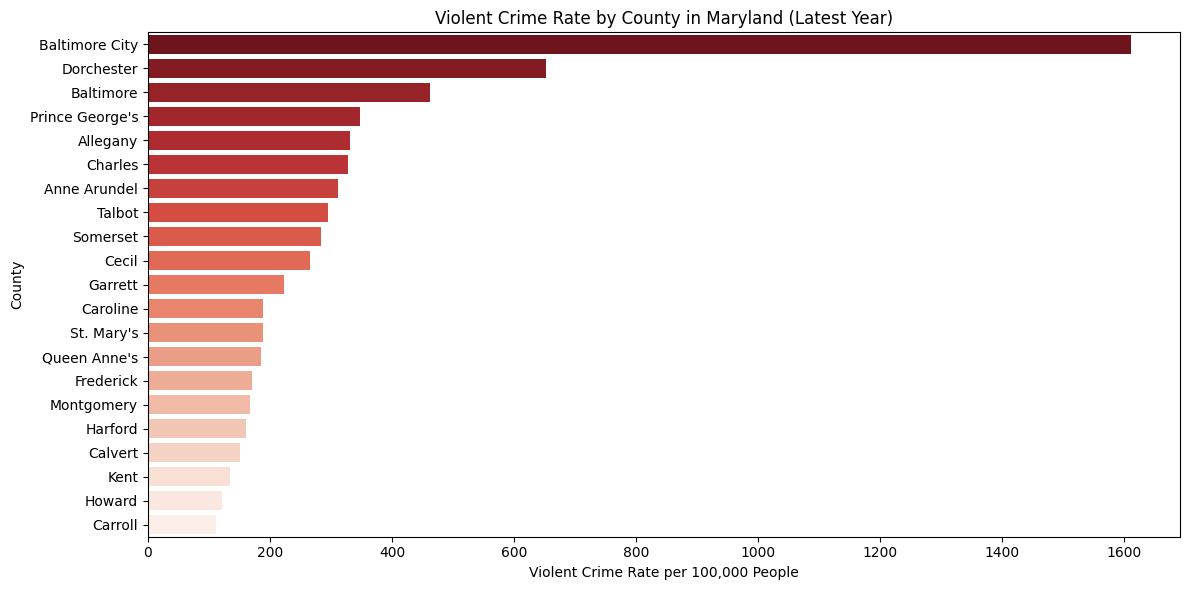

In [ ]:
county_crime_df_sorted = county_crime_df.sort_values('violent_crime_rate_per_100_000_people', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(
    data=county_crime_df_sorted,
    x='violent_crime_rate_per_100_000_people',
    y='county',
    hue='county',
    dodge=False,
    legend=False,
    palette='Reds_r'
)

plt.xlabel("Violent Crime Rate per 100,000 People")
plt.ylabel("County")
plt.title("Violent Crime Rate by County in Maryland (Latest Year)")
plt.tight_layout()
plt.show()


In [ ]:
# Select relevant crime rate columns
crime_features = [
    'murder_per_100_000_people', 'rape_per_100_000_people', 'robbery_per_100_000_people',
    'agg_assault_per_100_000_people', 'b_e_per_100_000_people',
    'larceny_theft_per_100_000_people', 'm_v_theft_per_100_000_people'
]

# Drop any missing values in those columns
crime_data = county_crime_df.dropna(subset=crime_features).copy()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(crime_data[crime_features])


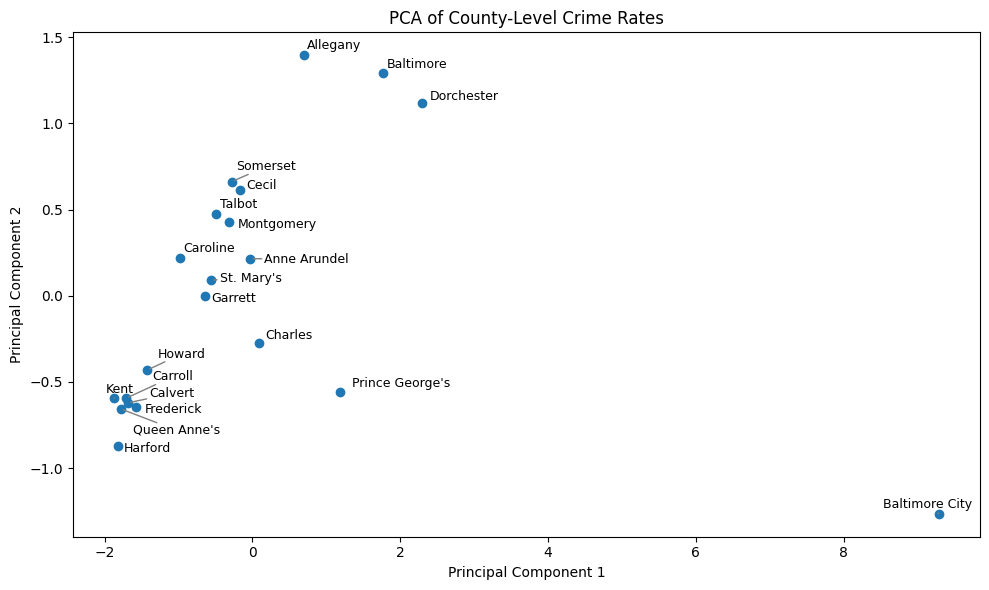

,PC1,PC2
murder_per_100_000_people,0.385484,-0.510582
rape_per_100_000_people,0.336234,0.247538
robbery_per_100_000_people,0.401542,-0.372002
agg_assault_per_100_000_people,0.400763,0.011737
b_e_per_100_000_people,0.375195,0.420843
larceny_theft_per_100_000_people,0.352577,0.551364
m_v_theft_per_100_000_people,0.389127,-0.241656


In [ ]:
# Run PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

# Add PCA result to dataframe
crime_data['PC1'] = pca_components[:, 0]
crime_data['PC2'] = pca_components[:, 1]

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(crime_data['PC1'], crime_data['PC2'])

# Use adjust_text for non-overlapping labels
texts = []
for i, row in crime_data.iterrows():
    texts.append(plt.text(row['PC1'], row['PC2'], row['county'], fontsize=9))

adjust_text(texts, arrowprops=dict(arrowstyle="-", color='gray'))

plt.title("PCA of County-Level Crime Rates")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.tight_layout()
plt.show()

# Get component loadings
loadings = pd.DataFrame(
    pca.components_.T,
    index=crime_features,
    columns=['PC1', 'PC2']
)

display(loadings)


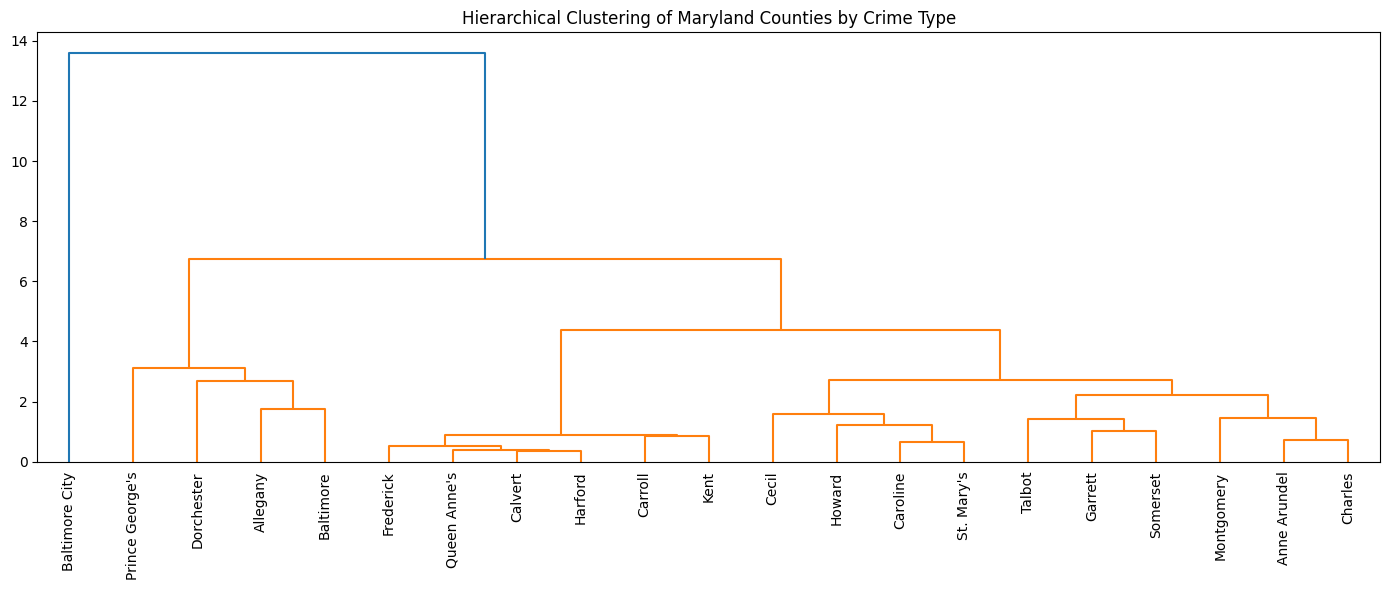

In [ ]:
# Perform hierarchical clustering
linkage_matrix = linkage(X_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(14, 6))
dendrogram(
    linkage_matrix,
    labels=crime_data['county'].values,
    leaf_rotation=90,
    leaf_font_size=10
)
plt.title("Hierarchical Clustering of Maryland Counties by Crime Type")
plt.tight_layout()
plt.show()


# Crime Rate

Graph based conclusions: https://docs.google.com/document/d/1HR4YUYdQ3BKiC6ECeSTTuvoRRuR7up5Nezd7sdIG7EM/edit?usp=sharing

Note: Jurisdiction means city

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://opendata.maryland.gov/api/views/2p5g-xrcb/rows.csv?accessType=DOWNLOAD"
crime_rate_df = pd.read_csv(url)

# strip extra spaces from all column names
crime_rate_df.columns = crime_rate_df.columns.str.strip()
crime_rate_df

,JURISDICTION,COUNTY,YEAR,POPULATION,MURDER,RAPE,ROBBERY,AGG. ASSAULT,B & E,LARCENY THEFT,...,"VIOLENT CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE","PROPERTY CRIME RATE PER 100,000 PEOPLE","PROPERTY CRIME RATE PERCENT CHANGE PER 100,000 PEOPLE","MURDER PER 100,000 PEOPLE","RAPE PER 100,000 PEOPLE","ROBBERY PER 100,000 PEOPLE","AGG. ASSAULT PER 100,000 PEOPLE","B & E PER 100,000 PEOPLE","LARCENY THEFT PER 100,000 PEOPLE","M/V THEFT PER 100,000 PEOPLE"
0,Galestown,Dorchester,2008,101,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Goldsboro,Caroline,2014,247,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Henderson,Caroline,1997,66,0,0,0,0,0,0,...,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Keedysville,Washington,1990,464,0,0,0,0,2,2,...,NaN,862.1,NaN,0.0,0.0,0.0,0.0,431.1,431.1,0.0
4,Kitzmiller,Garrett,1996,275,0,0,0,0,0,0,...,0.0,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4279,Woodsboro,Frederick,2016,1185,0,0,0,0,0,0,...,-100.0,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4280,Woodsboro,Frederick,2017,1185,0,0,0,1,1,0,...,84.4,84.4,84.4,0.0,0.0,0.0,84.4,84.4,0.0,0.0
4281,Woodsboro,Frederick,2018,1240,0,0,0,1,0,1,...,-4.4,80.6,-4.4,0.0,0.0,0.0,80.6,0.0,80.6,0.0
4282,Woodsboro,Frederick,2019,1240,0,0,0,0,0,0,...,-100.0,0.0,-100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


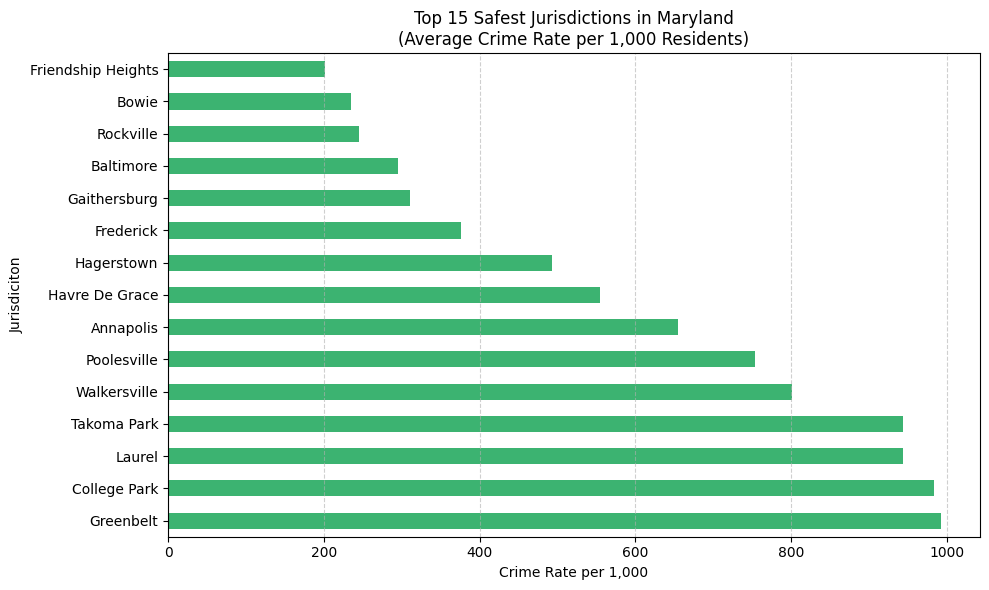

note, this includes non lethal crime and minor crimes
Hypothesis Test: Population in Top 15 Safest vs Others
T-statistic: 9.224
P-value: 0.00000 (rounded)


In [ ]:
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

crime_start_idx = crime_rate_df.columns.get_loc("POPULATION") + 1
crime_cols = crime_rate_df.columns[crime_start_idx:]

crime_cols = [col for col in crime_cols if pd.api.types.is_numeric_dtype(crime_rate_df[col])]

# Compute crime rate
crime_rate_df["TOTAL CRIME"] = crime_rate_df[crime_cols].sum(axis=1)

# Compute crime rate per 1,000 people
crime_rate_df["Crime Rate per 1,000"] = crime_rate_df["TOTAL CRIME"] / crime_rate_df["POPULATION"] * 1000

avg_crime_rate = crime_rate_df.groupby("JURISDICTION")["Crime Rate per 1,000"].mean().sort_values()

plt.figure(figsize=(10, 6))
avg_crime_rate.head(15).plot(kind="barh", color="mediumseagreen")  # head shows lowest, tail shows highest
plt.title("Top 15 Safest Jurisdictions in Maryland\n(Average Crime Rate per 1,000 Residents)")
plt.xlabel("Crime Rate per 1,000")
plt.ylabel("Jurisdiciton")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

safe_jurisdictions = avg_crime_rate.head(15).index
pop_safe = crime_rate_df[crime_rate_df['JURISDICTION'].isin(safe_jurisdictions)]['POPULATION']

# Other jurisdictions
pop_other = crime_rate_df[~crime_rate_df['JURISDICTION'].isin(safe_jurisdictions)]['POPULATION']

t_stat, p_val = ttest_ind(pop_safe, pop_other, equal_var=False)

print("note, this includes non lethal crime and minor crimes")
print("Hypothesis Test: Population in Top 15 Safest vs Others")
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.5f}", "(rounded)")


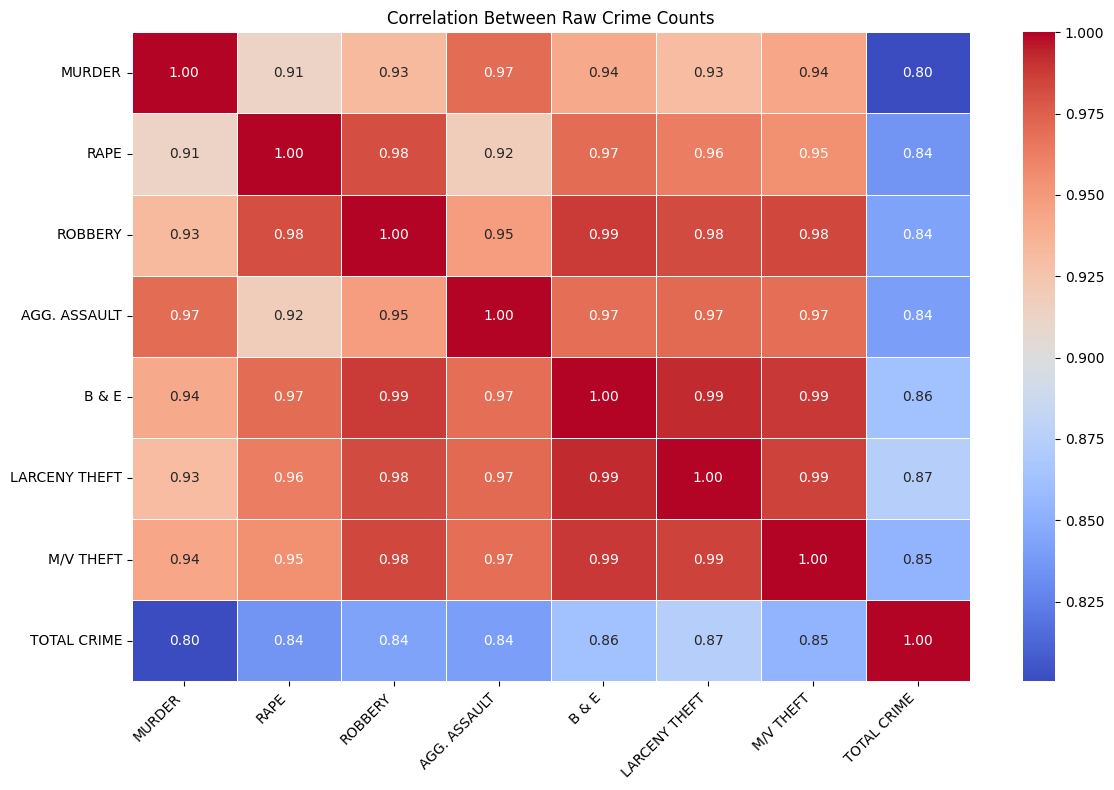

Total unique crime pairs compared: 28
Average t-statistic across all unique crime type pairs: -13.877
Average p-value across all unique crime type pairs: 0.05234


In [ ]:
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

exclude_cols = ["GRAND TOTAL CRIME", "VIOLENT CRIME TOTAL", "GRAND TOTAL"]

# Filter raw crime columns
raw_crime_cols = [
    col for col in crime_rate_df.columns
    if (col not in ["JURISDICTION", "COUNTY", "YEAR", "POPULATION"] + exclude_cols) and
       pd.api.types.is_numeric_dtype(crime_rate_df[col]) and
       "PER" not in col.upper() and
       "RATE" not in col.upper()
]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(crime_rate_df[raw_crime_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Raw Crime Counts")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

t_stats = []
p_values = []

for i in range(len(raw_crime_cols)):
    for j in range(i + 1, len(raw_crime_cols)):
        col1 = raw_crime_cols[i]
        col2 = raw_crime_cols[j]

        subset = crime_rate_df[[col1, col2]].dropna()

        if len(subset) > 2:
            t_stat, p_val = ttest_ind(subset[col1], subset[col2], equal_var=False)
            t_stats.append(t_stat)
            p_values.append(p_val)

avg_t_stat = np.mean(t_stats)
avg_p_value = np.mean(p_values)

print(f"Total unique crime pairs compared: {len(p_values)}")
print(f"Average t-statistic across all unique crime type pairs: {avg_t_stat:.3f}")
print(f"Average p-value across all unique crime type pairs: {avg_p_value:.5f}")


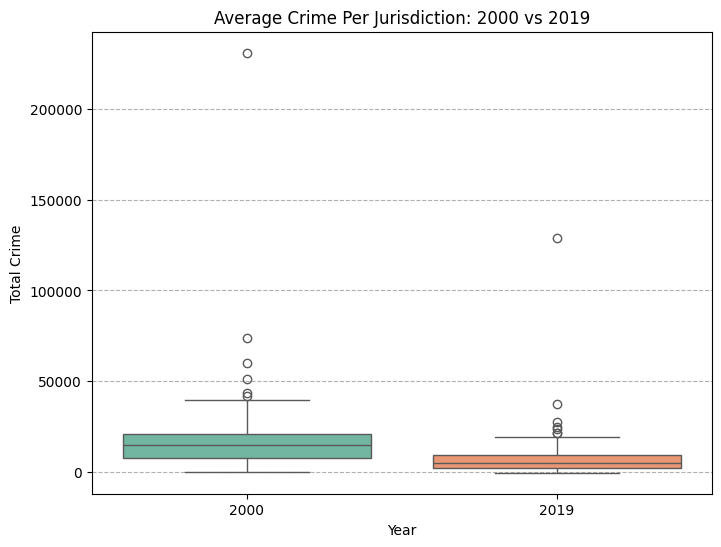

T-statistic: 4.900
P-value: 0.00000 (rounded)


In [ ]:
from scipy.stats import ttest_ind
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

crime_2000 = crime_rate_df[crime_rate_df["YEAR"] == 2000]["TOTAL CRIME"]
crime_2019 = crime_rate_df[crime_rate_df["YEAR"] == 2019]["TOTAL CRIME"]

# combine into one DataFrame
combined_df = pd.concat([
    crime_2000.to_frame().assign(Year="2000"),
    crime_2019.to_frame().assign(Year="2019")
])

plt.figure(figsize=(8, 6))
sns.boxplot(data=combined_df, x="Year", y="TOTAL CRIME", hue="Year", palette="Set2")
plt.title("Average Crime Per Jurisdiction: 2000 vs 2019")
plt.ylabel("Total Crime")
plt.grid(True, linestyle='--', axis='y')

plt.legend([], [], frameon=False)

plt.show()

t_stat, p_val = ttest_ind(crime_2000, crime_2019, equal_var=False)

# Print hypothesis testing
print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.5f}", "(rounded)")


#Weather

## Data on the average temperature in Maryland

### Procedure:
1) We're going to gather the average temperature of each county in MD in 2024.

2) Using this data we need to make a good hypothesis test that gives us valuable data on these records.

3) Use an appropriate graph highlighting the argument.

4) Derive a conclusion explaining the data we found from conducting the hypothesis test



### 1. Gathering the average temperature of each county in MD

In [ ]:
#importing the average temperature of each county per month
#january
temp_df = pd.read_csv('jan.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'Jan'})
#february
temp_month = pd.read_csv('feb.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'Feb'})

temp_df = pd.merge(temp_df,temp_month, on='County', how='inner')

#march
temp_month = pd.read_csv('march.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'Mar'})

temp_df = pd.merge(temp_df,temp_month, on='County', how='inner')

#april
temp_month = pd.read_csv('april.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'April'})

temp_df = pd.merge(temp_df,temp_month, on='County', how='inner')

#may
temp_month = pd.read_csv('may.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'May'})

temp_df = pd.merge(temp_df,temp_month, on='County', how='inner')

#june
temp_month = pd.read_csv('june.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'June'})

temp_df = pd.merge(temp_df,temp_month, on='County', how='inner')

#july
temp_month = pd.read_csv('july.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'July'})

temp_df = pd.merge(temp_df,temp_month, on='County', how='inner')

#august
temp_month = pd.read_csv('august.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'Aug'})
temp_df = pd.merge(temp_df,temp_month, on='County', how='inner')

#september
temp_month = pd.read_csv('september.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'Sep'})

temp_df = pd.merge(temp_df,temp_month, on='County', how='inner')

#october
temp_month = pd.read_csv('october.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'Oct'})

temp_df = pd.merge(temp_df,temp_month, on='County', how='inner')

#november
temp_month = pd.read_csv('november.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'Nov'})

temp_df = pd.merge(temp_df,temp_month, on='County', how='inner')

#december
temp_month = pd.read_csv('december.csv')[['Name', 'Value']].rename(columns={'Name': 'County', 'Value': 'Dec'})

temp_df = pd.merge(temp_df,temp_month, on='County', how='inner')

# Column for the average annual temperature of each county
month_names = ['Jan', 'Feb', 'Mar', 'April', 'May', 'June','July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
temp_df['Avg_Annual_Temp'] = temp_df[month_names].mean(axis=1)

temp_df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'jan.csv'

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Avg_Annual_Temp', y='County', data=temp_df)
plt.title('Average Annual Temperature by County')
plt.xlabel('Average Temperature (°F)')
plt.ylabel('County')
plt.tight_layout()
plt.show()

### 2. Hypothesis Testing: Is the mean different from 60°F?
**Null Hypothesis (H₀):** Mean monthly temperature of each county is not different from 60°F.

**Alternative Hypothesis (H₁):** Mean monthly temperature of each county is different 60°F.

In [ ]:
results = []

for idx, row in temp_df.iterrows():
    county = row['County']
    temps = row[['Jan', 'Feb', 'Mar', 'April', 'May', 'June','July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']].values.astype(float)
    t_stat, p_val = stats.ttest_1samp(temps, popmean=60)
    results.append({
        'County': county,
        'Sample Mean': temps.mean(),
        'Sample SD': temps.std(ddof=1),
        'T-statistic': t_stat,
        'P-value': math.floor(p_val),
    })

results_df = pd.DataFrame(results)
results_df.head()

### 3. Plotting the graph

In [ ]:

plt.figure(figsize=(14, 6))
sns.barplot(x='County', y='Avg_Annual_Temp', data=temp_df)

plt.axhline(y=60, color = 'red', linestyle='-', label='60°F')

plt.title('Average Annual Temperature by County')
plt.xlabel('County')
plt.ylabel('Average Temperature (°F)')
plt.xticks(rotation=90)
plt.ylim(50, 70)
plt.legend()
plt.show()


### 4. What does this mean?
The T-test is high, most are positive. This observation indicates we're able to reject the null hypothesis. Additionally, with the **minimum T-Stat is 3.67** and the **maximum is 721.00**, the data makes the argument that although there's certain areas in MD with temperatures significantly higher than 60°F during 2024, some areas in MD are similar in temperatures.

In conclusion, the data suggets that throughout the year, majority of places in Maryland are hotter than 60°F. We concluded this by assessing the T-test of each county in MD. Furthermore, despite majority of the temperatures being warmer than 60°F, some areas are more adequate than others with some even being moderately the same.

This EDA helps us present an argument about optimal places to live in MD. With understanding that places are warmer than 60°F, we can form an argument suggesting places that suits a person's needs.